# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

#### **Importing Libraries**

In [35]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


#### Load the preprocessed dataset

In [36]:
# Loading the 2023 FIES Dataset Volume 2
final_fies = pd.read_csv('../../data/processed/final_fies.csv')


In [37]:
final_fies

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR,SOCIAL_CLASS
0,13,39,105930,3900,4.0,352200,0,352200,0,0,0,0,0,0,0,0,0,2276.0,0,0,0,0,0,0,0,0,0,0,0,0,27979.0,30420.0,16640.0,2020.0,4620.0,3340.0,8710.0,1595.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,105759.0,81565.0,187324.0,2370,36660,0,15000,3000,18000,2674,1860,6344,8200,0,0,8166,7122,0,0,0,900,0,73396.0,369476.0,260720.0,261620.0,5000,374476.0,2151,405.804138,1479.726685,1,92369.000000,7,4,5,5,4,13,Low income
1,13,39,105931,3900,5.5,219760,0,219760,0,60000,0,80000,0,0,0,0,0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,39031.0,24925.0,18200.0,8900.0,1565.0,4640.0,10450.0,660.0,1685.0,0.0,3215.0,0.0,0.0,1690.0,0.0,0.0,0.0,9200.0,0.0,0,0,114961.0,114000.0,228961.0,2650,70440,0,37800,0,37800,5510,21595,3720,13660,5080,0,0,14996,0,500,0,0,0,147351.0,398060.0,376312.0,376312.0,40000,438060.0,2151,405.804138,2034.624191,1,72374.546875,6,3,3,3,3,13,Lower-middle income
2,13,39,105932,3900,2.0,0,0,0,0,0,6000,0,0,0,0,0,0,500.0,0,0,0,0,156000,0,0,0,0,0,156000,0,20289.0,17320.0,8450.0,1630.0,1565.0,1430.0,22425.0,2085.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,85629.0,10400.0,96029.0,2730,37380,6000,12000,0,18000,4742,1690,6500,5200,100,150,0,6654,0,1500,0,10000,0,66646.0,174500.0,162675.0,172675.0,8000,182500.0,2151,405.804138,739.863342,1,87250.000000,7,4,4,4,4,13,Poor
3,13,39,105933,3900,7.5,338800,0,338800,0,0,1000,0,0,0,0,0,0,200.0,0,0,0,0,0,0,84000,0,0,0,84000,0,37285.0,37050.0,31200.0,5125.0,1500.0,5230.0,5800.0,1055.0,3420.0,0.0,10956.0,0.0,0.0,1560.0,455.0,0.0,0.0,1840.0,0.0,0,0,140636.0,161600.0,302236.0,960,69760,0,48000,0,48000,3300,300,5668,7800,1820,0,0,14956,0,1100,0,5000,0,107504.0,472000.0,409740.0,414740.0,7500,479500.0,2151,405.804138,2774.487534,1,62933.332031,5,2,2,2,2,13,Lower-middle income
4,13,39,105934,3900,11.0,471720,0,471720,0,0,6600,0,0,0,0,0,0,0.0,0,0,0,0,312000,0,0,0,0,0,312000,0,53135.0,40040.0,50160.0,8610.0,2145.0,3510.0,17290.0,2857.0,2495.0,0.0,10950.0,0.0,0.0,3380.0,0.0,0.0,9360.0,0.0,0.0,0,0,194572.0,238080.0,432652.0,2200,61940,0,30000,0,30000,6118,1800,39000,15600,0,0,5826,17400,0,6000,4500,60900,0,169744.0,820320.0,602396.0,663296.0,55000,875320.0,2151,405.804138,4069.248383,1,74574.546875,6,3,3,3,3,13,Lower-middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19487,13,76,126615,7607,5.0,249360,0,249360,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,166500,0,0,0,166500,0,28555.0,21406.0,12900.0,16920.0,2820.0,1870.0,3640.0,1675.0,2830.0,0.0,3042.0,0.0,0.0,2600.0,870.0,0.0,5100.0,2600.0,0.0,0,0,99128.0,30700.0,129828.0,2410,105940,0,72000,0,72000,10174,5250,14300,12374,75,0,10800,16155,0,0,2000,3800,0,187178.0,487860.0,317006.0,320806.0,0,487860.0,780,216.904846,977.090073,1,97572.000000,7,5,4,5,5,13,Low income
19488,13,76,126616,7607,1.0,215720,0,215720,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,12363.0,6280.0,4070.0,1050.0,336.0,725.0,840.0,150.0

In [38]:
# Define the correct order for SOCIAL_CLASS
final_fies['SOCIAL_CLASS'] = pd.Categorical(
    final_fies['SOCIAL_CLASS'], 
    categories=['Poor', 'Low income', 'Lower-middle income', 'Middle income'], 
    ordered=True
)

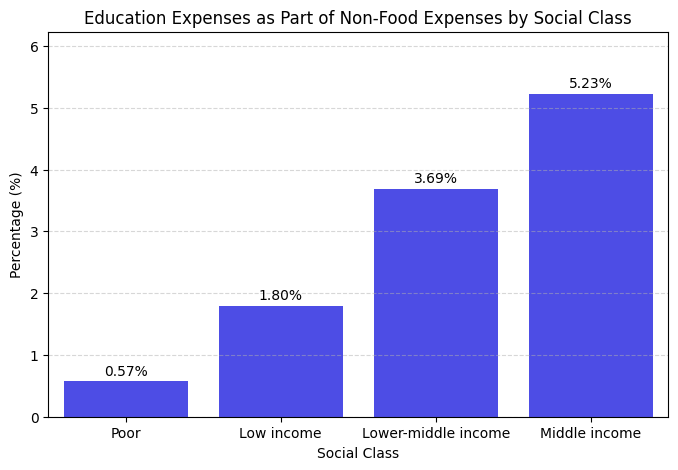

In [39]:
# Group by social class and calculate mean percentage directly
percentages = final_fies.groupby('SOCIAL_CLASS', observed=True).apply(
    lambda x: ((x['EDUCATION']) / x['NFOOD']).mean() * 100, include_groups=False
)

# Bar plot for better visualization of small percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=percentages.index, y=percentages.values, color='blue', alpha=0.8)

# Add percentage labels for clarity
for i, v in enumerate(percentages.values):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center')

plt.title('Education Expenses as Part of Non-Food Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(percentages.values) + 1) 
plt.show()


Education Expenses as Part of Non-Food Expenses by Social Class

This visualization shows the proportion of education expenses in non food expenditures by social class. The 'Poor' social group have a very low proportion for education which can mean this group have a more priority expenses rather than education.

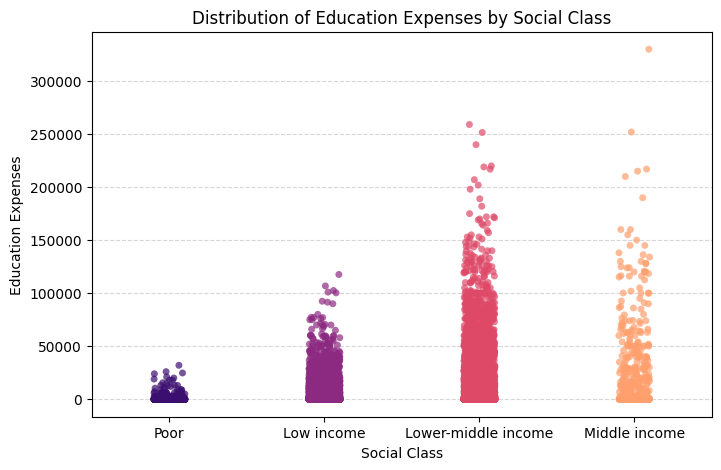

In [40]:
plt.figure(figsize=(8, 5))
sns.stripplot(
    x='SOCIAL_CLASS', 
    y='EDUCATION', 
    data=final_fies, 
    palette='magma', 
    hue='SOCIAL_CLASS',
    jitter=True,        # Adds slight horizontal spread to reduce point overlap
    alpha=0.7,          # Transparency for better visibility
    size=5              # Point size for clarity
)

plt.title('Distribution of Education Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Education Expenses')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Improves readability
plt.show()


Distribution of Education Expenses by Social Class

This visualization shows the distribution of education expenses by social class. It is noticeable here that both lower-middle income and middle income social group have more money to spare for education. This groups also likely can afford more expensive education institutes like private schools.

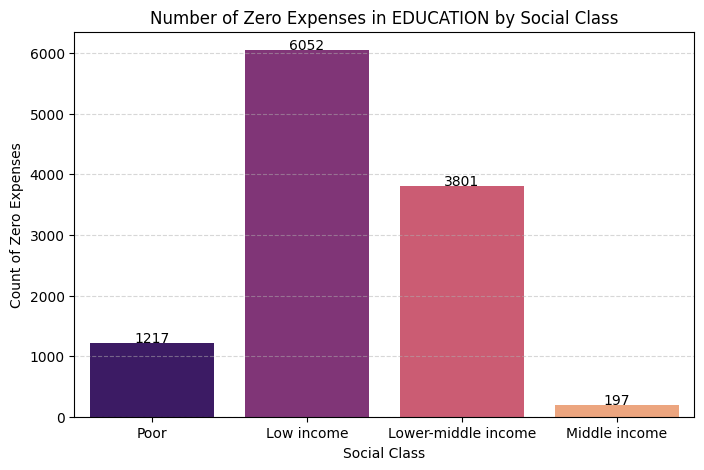

In [41]:
# Count zero expenses in EDUCATION by SOCIAL_CLASS
zero_education_counts = (final_fies.groupby('SOCIAL_CLASS', observed=False)['EDUCATION']
                         .apply(lambda x: (x == 0).sum())
                         .reset_index(name='Zero_Education_Count'))

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='SOCIAL_CLASS', y='Zero_Education_Count', data=zero_education_counts, 
            hue='SOCIAL_CLASS', palette='magma', legend=False)

# Add labels for clarity
for i, v in enumerate(zero_education_counts['Zero_Education_Count']):
    plt.text(i, v + 10, str(v), ha='center')

plt.title('Number of Zero Expenses in EDUCATION by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Count of Zero Expenses')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Number of Zero Expenses in EDUCATION by Social Class

This visualization shows the number of zero expenses in education expenses by social class. it shows a high count to both low income and lower-middle income followedby poor and middle income. This can mean that this count may have availed scholarships or decided not to spend anymore for education.